<h1> 20185255 심현석 머신러닝 기말프로젝트


                               데이터 설명


  <h1> 이 데이터는 캐글에서 가져온 bodyPerformance 데이터 입니다.

<h1>사람의 성별 유연성 몸무게 체지방률 키 여러가지 신체요소를 특징으로 등급을 측정하는 모델입니다,다중 분류 모델 입니다.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
from sklearn.metrics import confusion_matrix
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16512\2636086012.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
body_df = pd.read_csv('C:/Users\ASUS/Desktop/머신러닝/bodyPerformance.csv')#데이터를 불러왔습니다.

In [3]:
body_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
body_df.info() #null값이 없다는것을 확인 하였다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
body_df['class'].value_counts()#범주형 데이터들의 개수를 확인

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [6]:
body_df['gender'].value_counts()#범주형 데이터들의 개수를 확인

M    8467
F    4926
Name: gender, dtype: int64

<AxesSubplot:xlabel='body fat_%', ylabel='weight_kg'>

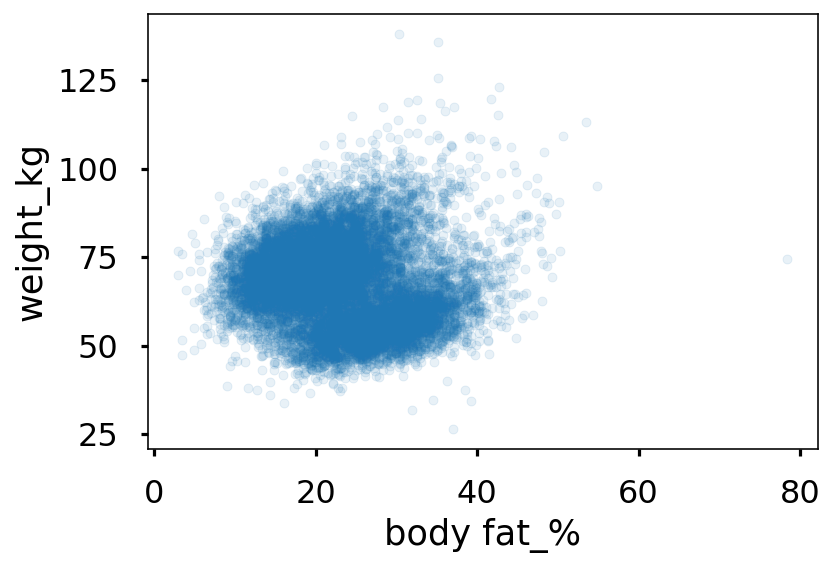

In [7]:
body_df.plot(kind="scatter", x="body fat_%", y="weight_kg",alpha=0.1)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height_cm'}>,
        <AxesSubplot:title={'center':'weight_kg'}>],
       [<AxesSubplot:title={'center':'body fat_%'}>,
        <AxesSubplot:title={'center':'diastolic'}>,
        <AxesSubplot:title={'center':'systolic'}>],
       [<AxesSubplot:title={'center':'gripForce'}>,
        <AxesSubplot:title={'center':'sit and bend forward_cm'}>,
        <AxesSubplot:title={'center':'sit-ups counts'}>],
       [<AxesSubplot:title={'center':'broad jump_cm'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

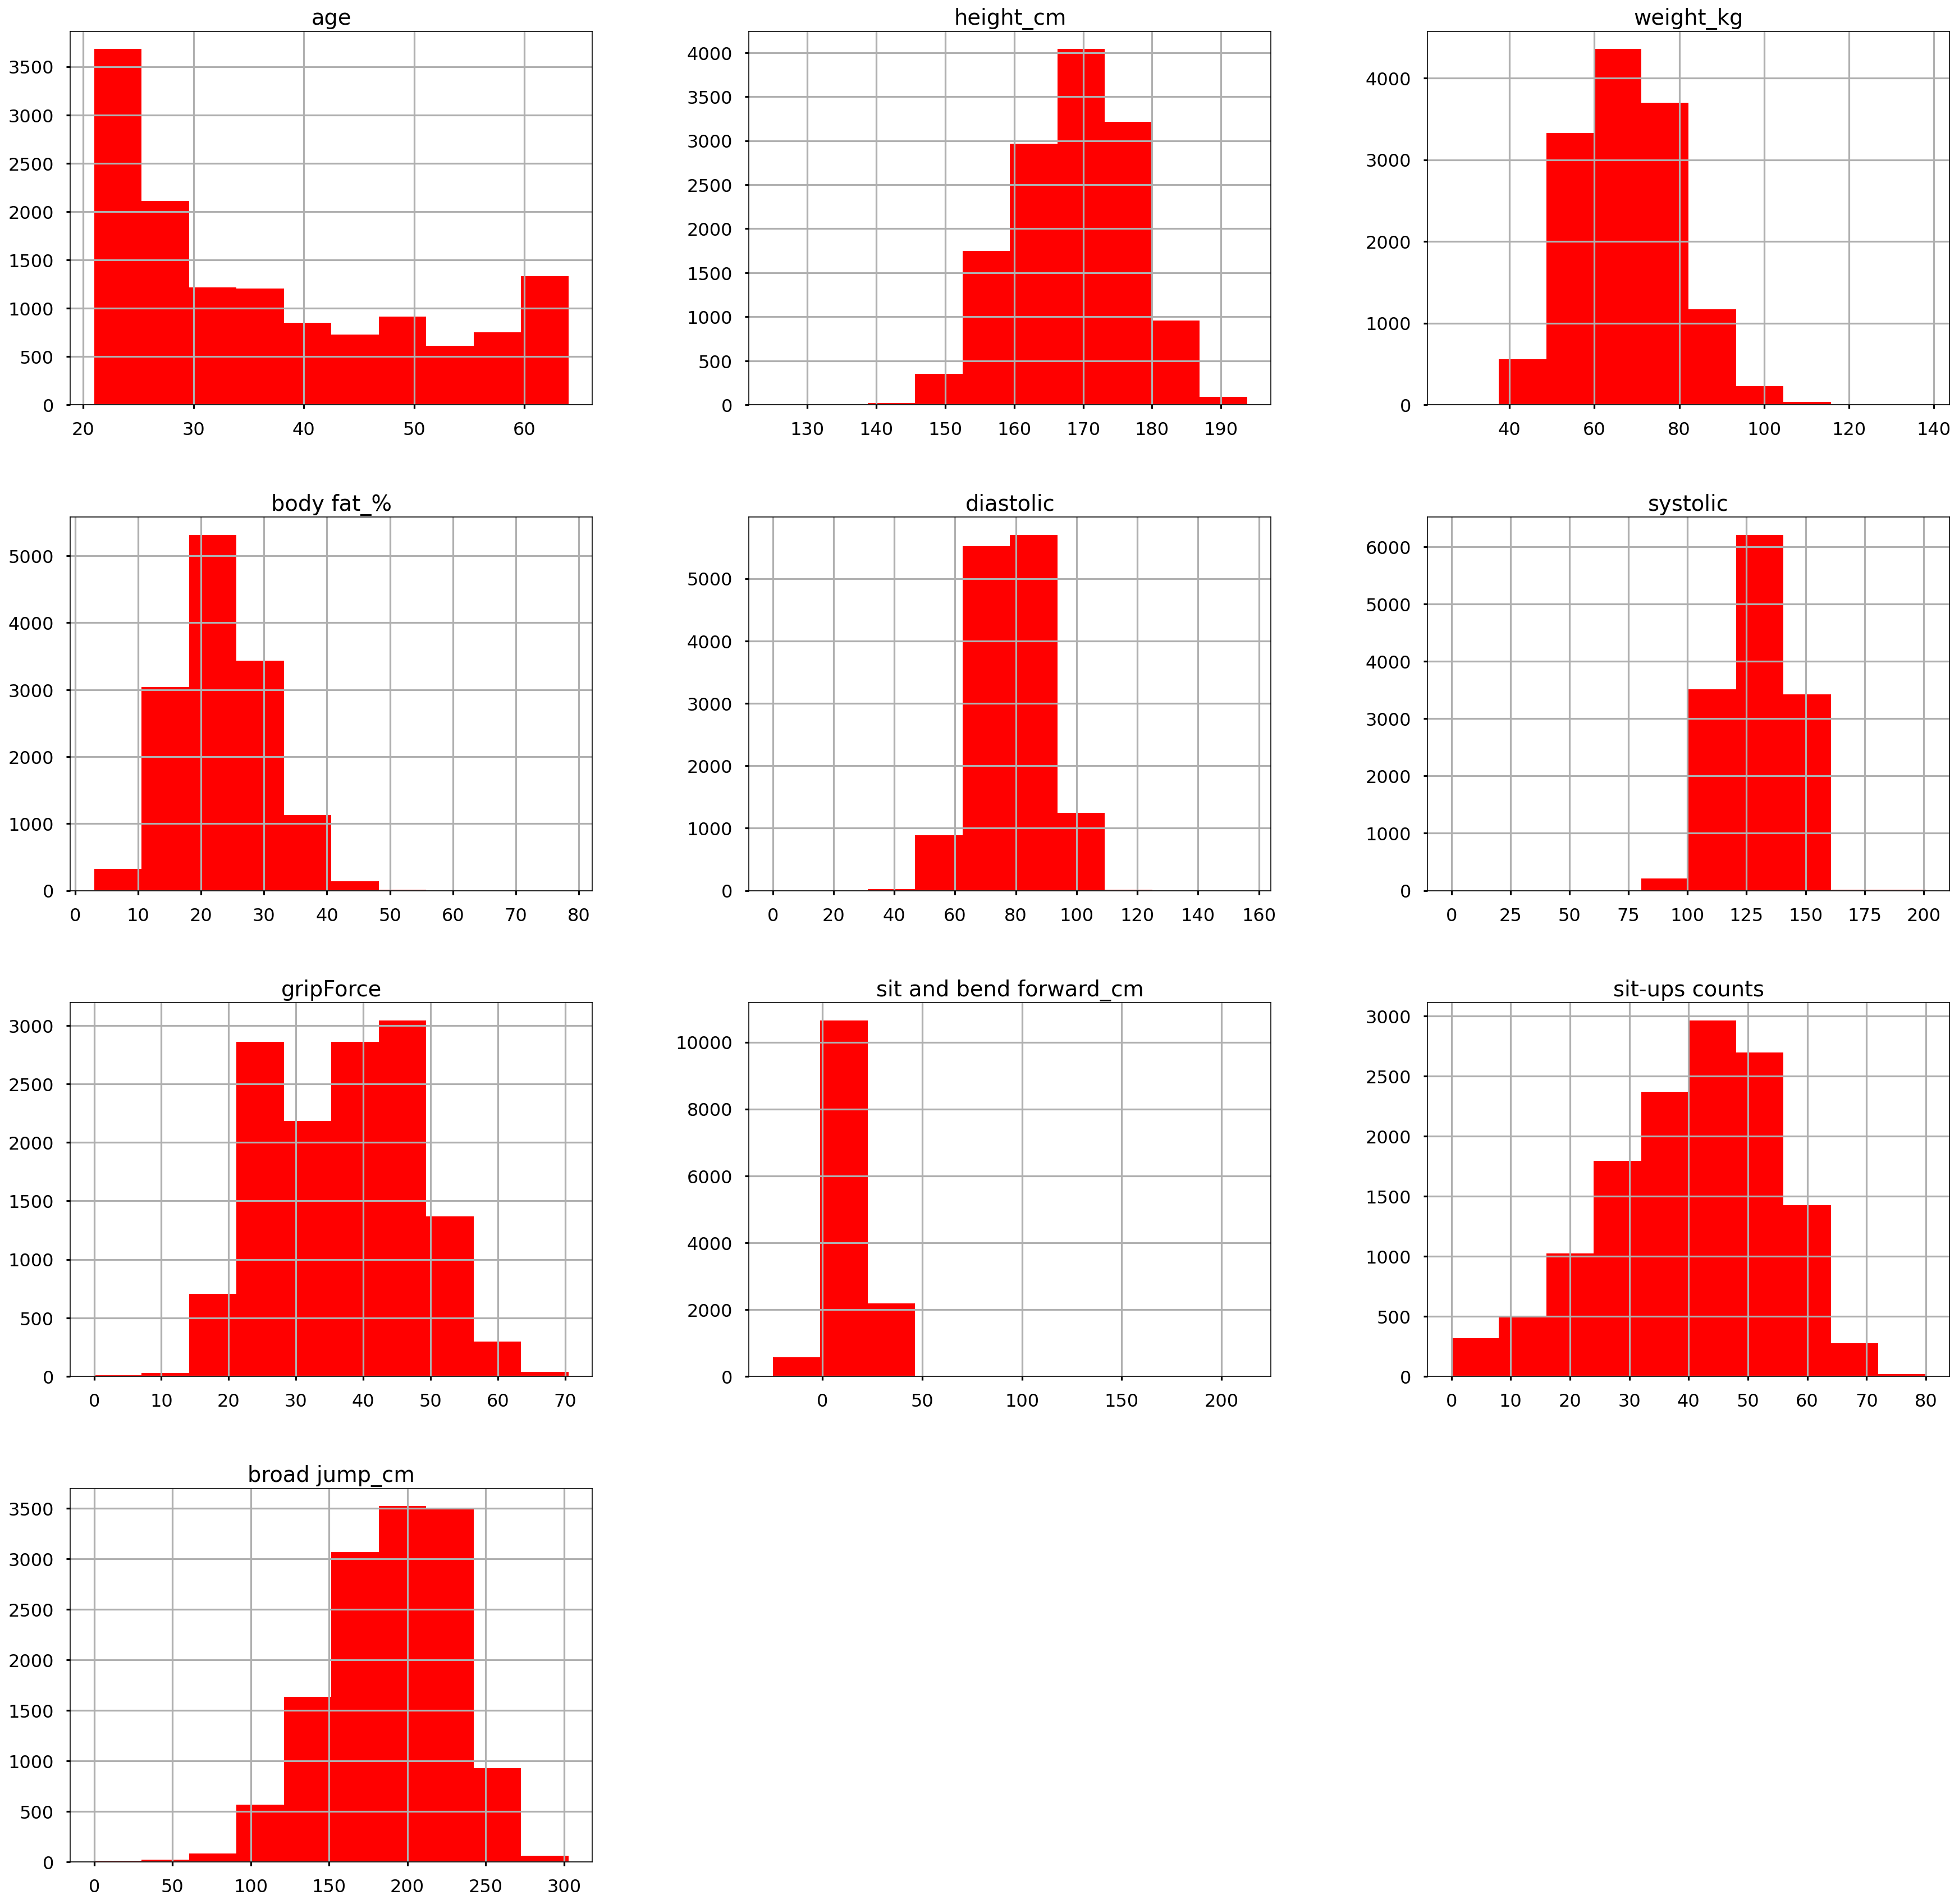

In [8]:
body_df.hist(figsize=(30,30), color="red")#숫자형 데이터들을 시각화 하였다

<h1> 데이터 가공

In [9]:
body_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [10]:
body_df['gender'] =  body_df['gender'].replace({'M' : 1,'F' : 0}) # 문자형 데이터를 숫자화 시킴
body_df['class'] = body_df['class'].replace({"A" : 1,"B" : 2,"C" : 3,"D" : 4}) # 등급을 숫자화 시킴

In [11]:
corr_matrix = body_df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                      1.000000
body fat_%                 0.341956
weight_kg                  0.214129
gender                     0.075605
diastolic                  0.066761
age                        0.065612
height_cm                  0.037753
systolic                   0.035484
gripForce                 -0.136088
broad jump_cm             -0.262154
sit-ups counts            -0.452832
sit and bend forward_cm   -0.588123
Name: class, dtype: float64

<AxesSubplot:>

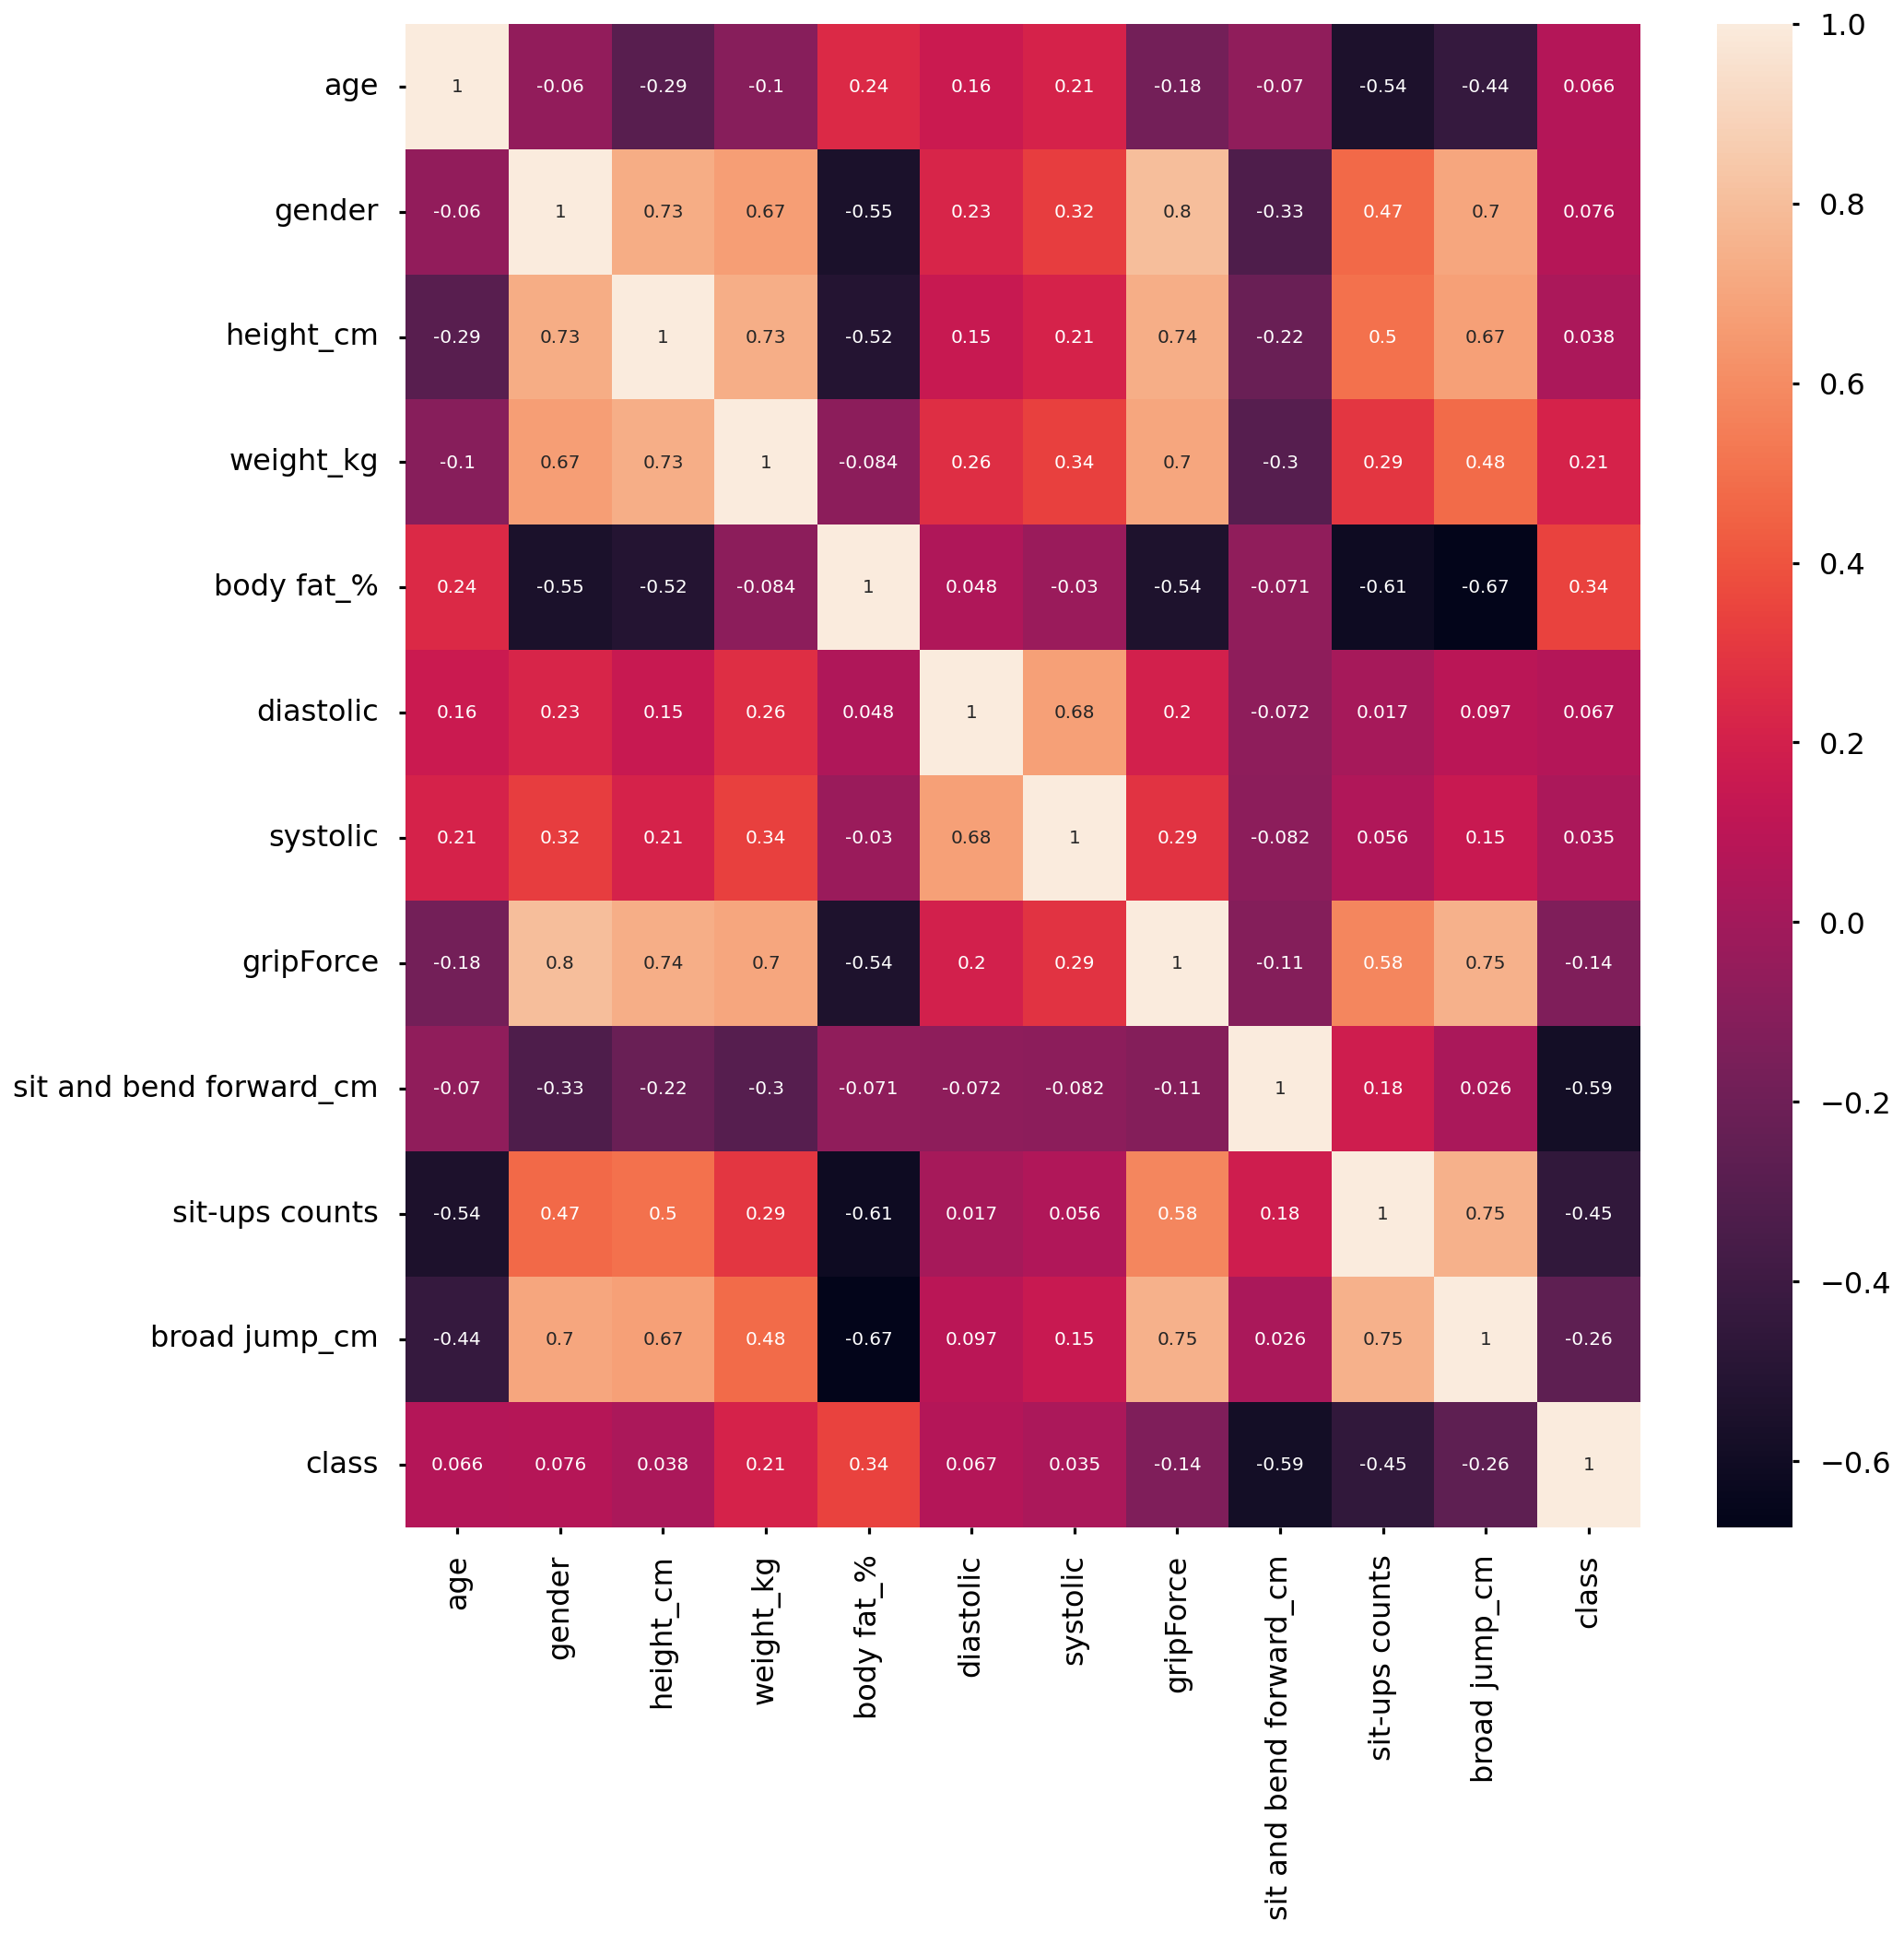

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(body_df.corr(), annot = True)

In [13]:
body_df['gender']#바뀐 데이터

0        1
1        1
2        1
3        1
4        1
        ..
13388    1
13389    1
13390    1
13391    0
13392    1
Name: gender, Length: 13393, dtype: int64

In [14]:
body_df['class']#바뀐 데이터 from sklearn.preprocessing import LabelEncoderd을 사용해도 되나 그냥 바꿈


0        3
1        1
2        3
3        2
4        2
        ..
13388    3
13389    4
13390    1
13391    4
13392    3
Name: class, Length: 13393, dtype: int64

In [15]:
body_df=body_df.drop(columns=['height_cm','systolic','age','diastolic'], axis=1)

In [16]:
body_df

,gender,weight_kg,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,1,75.24,21.3,54.9,18.4,60.0,217.0,3
1,1,55.80,15.7,36.4,16.3,53.0,229.0,1
2,1,78.00,20.1,44.8,12.0,49.0,181.0,3
3,1,71.10,18.4,41.4,15.2,53.0,219.0,2
4,1,67.70,17.1,43.5,27.1,45.0,217.0,2
...,...,...,...,...,...,...,...,...
13388,1,71.80,16.2,35.8,17.4,47.0,198.0,3
13389,1,63.90,12.1,33.0,1.1,48.0,167.0,4
13390,1,80.50,20.1,63.5,16.4,45.0,229.0,1
13391,0,57.70,40.4,19.3,9.2,0.0,75.0,4


In [17]:
y = body_df['class']
X = body_df.drop('class',axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
body_df1=scaler.transform(X)

In [19]:
body_df2=pd.DataFrame(data = body_df1,columns = X.columns)

In [20]:
body_df2

,gender,weight_kg,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.762750,0.652150,-0.267367,1.688190,0.377317,1.416961,0.674009
1,0.762750,-0.974734,-1.039081,-0.053073,0.128984,0.926634,0.975013
2,0.762750,0.883127,-0.432734,0.737554,-0.379509,0.646446,-0.229005
3,0.762750,0.305684,-0.667004,0.417538,-0.001096,0.926634,0.724176
4,0.762750,0.021147,-0.846152,0.615195,1.406129,0.366259,0.674009
...,...,...,...,...,...,...,...
13388,0.762750,0.364265,-0.970178,-0.109547,0.259063,0.506353,0.197418
13389,0.762750,-0.296866,-1.535183,-0.373090,-1.668480,0.576400,-0.580177
13390,0.762750,1.092346,-0.432734,2.497643,0.140809,0.366259,0.975013
13391,-1.311045,-0.815728,2.364730,-1.662566,-0.710621,-2.785848,-2.887878


<h1>Train Test 셋 분리

In [21]:
X_train, X_test, y_train, y_test = train_test_split(body_df2, y, train_size = 0.3, shuffle=True, random_state=42)#train set과 test set을 따로 분리하였다.

In [22]:
X_train

,gender,weight_kg,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
3240,0.762750,-0.069236,0.187394,1.001097,0.069856,0.086072,0.147251
10633,0.762750,-1.652603,-1.163106,0.041049,-0.273081,-0.614396,0.548590
3109,0.762750,0.129940,-0.956397,1.565831,-0.202128,0.226166,0.749260
5934,0.762750,-0.087647,0.669715,0.182232,-0.379509,0.016025,-0.053419
10962,0.762750,0.548378,-1.535183,0.906975,-1.242765,0.016025,1.802776
...,...,...,...,...,...,...,...
11964,0.762750,1.242984,-0.157122,1.085807,0.412794,0.926634,1.677357
5191,0.762750,-0.171335,-0.667004,-0.438975,-1.431971,0.296212,0.899762
5390,-1.311045,-1.506987,-1.011519,-1.107244,0.732080,0.506353,-0.203921
860,-1.311045,1.360146,2.709245,-1.446084,0.602000,0.226166,-0.605261


<h1>모델1: DecisionTree 모델

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_body_df = DecisionTreeClassifier()
tree_body_df.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, tree_body_df.predict(X_test)))

정확도:  0.5513011945392492


<h1> 트리를 시각화해서 표현

In [50]:
from sklearn.metrics import accuracy_score
decisiontree_df = DecisionTreeClassifier(max_depth=9,max_leaf_nodes=100,min_samples_split=8,random_state=42)
decisiontree_df .fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, decisiontree_df.predict(X_test)))


정확도:  0.6027090443686007


[Text(0.3124433876811594, 0.95, 'X[4] <= -0.728\ngini = 0.75\nsamples = 4017\nvalue = [977, 1068, 975, 997]'),
 Text(0.03985507246376811, 0.85, 'X[4] <= -1.261\ngini = 0.41\nsamples = 791\nvalue = [0, 14, 205, 572]'),
 Text(0.03260869565217391, 0.75, 'gini = 0.059\nsamples = 395\nvalue = [0, 0, 12, 383]'),
 Text(0.04710144927536232, 0.75, 'X[2] <= 0.194\ngini = 0.533\nsamples = 396\nvalue = [0, 14, 193, 189]'),
 Text(0.028985507246376812, 0.65, 'X[5] <= -0.159\ngini = 0.447\nsamples = 257\nvalue = [0, 10, 178, 69]'),
 Text(0.014492753623188406, 0.55, 'X[0] <= -0.274\ngini = 0.559\nsamples = 83\nvalue = [0, 6, 34, 43]'),
 Text(0.007246376811594203, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 8]'),
 Text(0.021739130434782608, 0.45, 'X[3] <= 0.77\ngini = 0.57\nsamples = 75\nvalue = [0, 6, 34, 35]'),
 Text(0.014492753623188406, 0.35, 'gini = 0.574\nsamples = 62\nvalue = [0, 6, 32, 24]'),
 Text(0.028985507246376812, 0.35, 'gini = 0.26\nsamples = 13\nvalue = [0, 0, 2, 11]'),
 Text(0.04

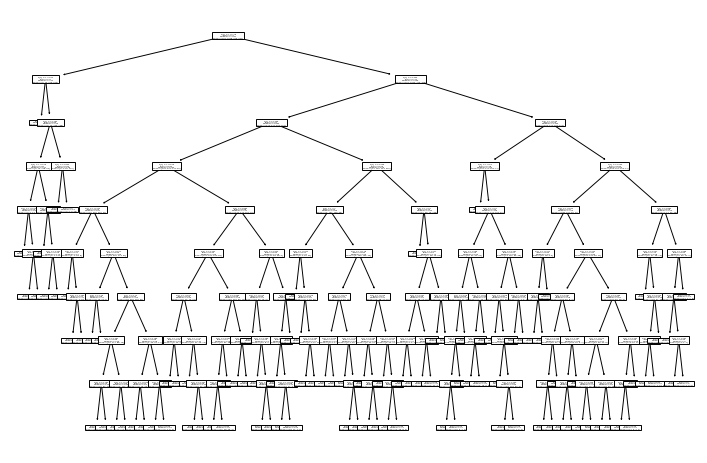

In [25]:
from sklearn import tree
tree.plot_tree(decisiontree_df)

In [26]:
from sklearn.metrics import confusion_matrix

d=confusion_matrix(y_test, decisiontree_df.predict(X_test))
print(d)

[[1661  602   74   34]
 [ 587 1258  290  144]
 [ 296  796 1038  244]
 [  70  268  320 1694]]


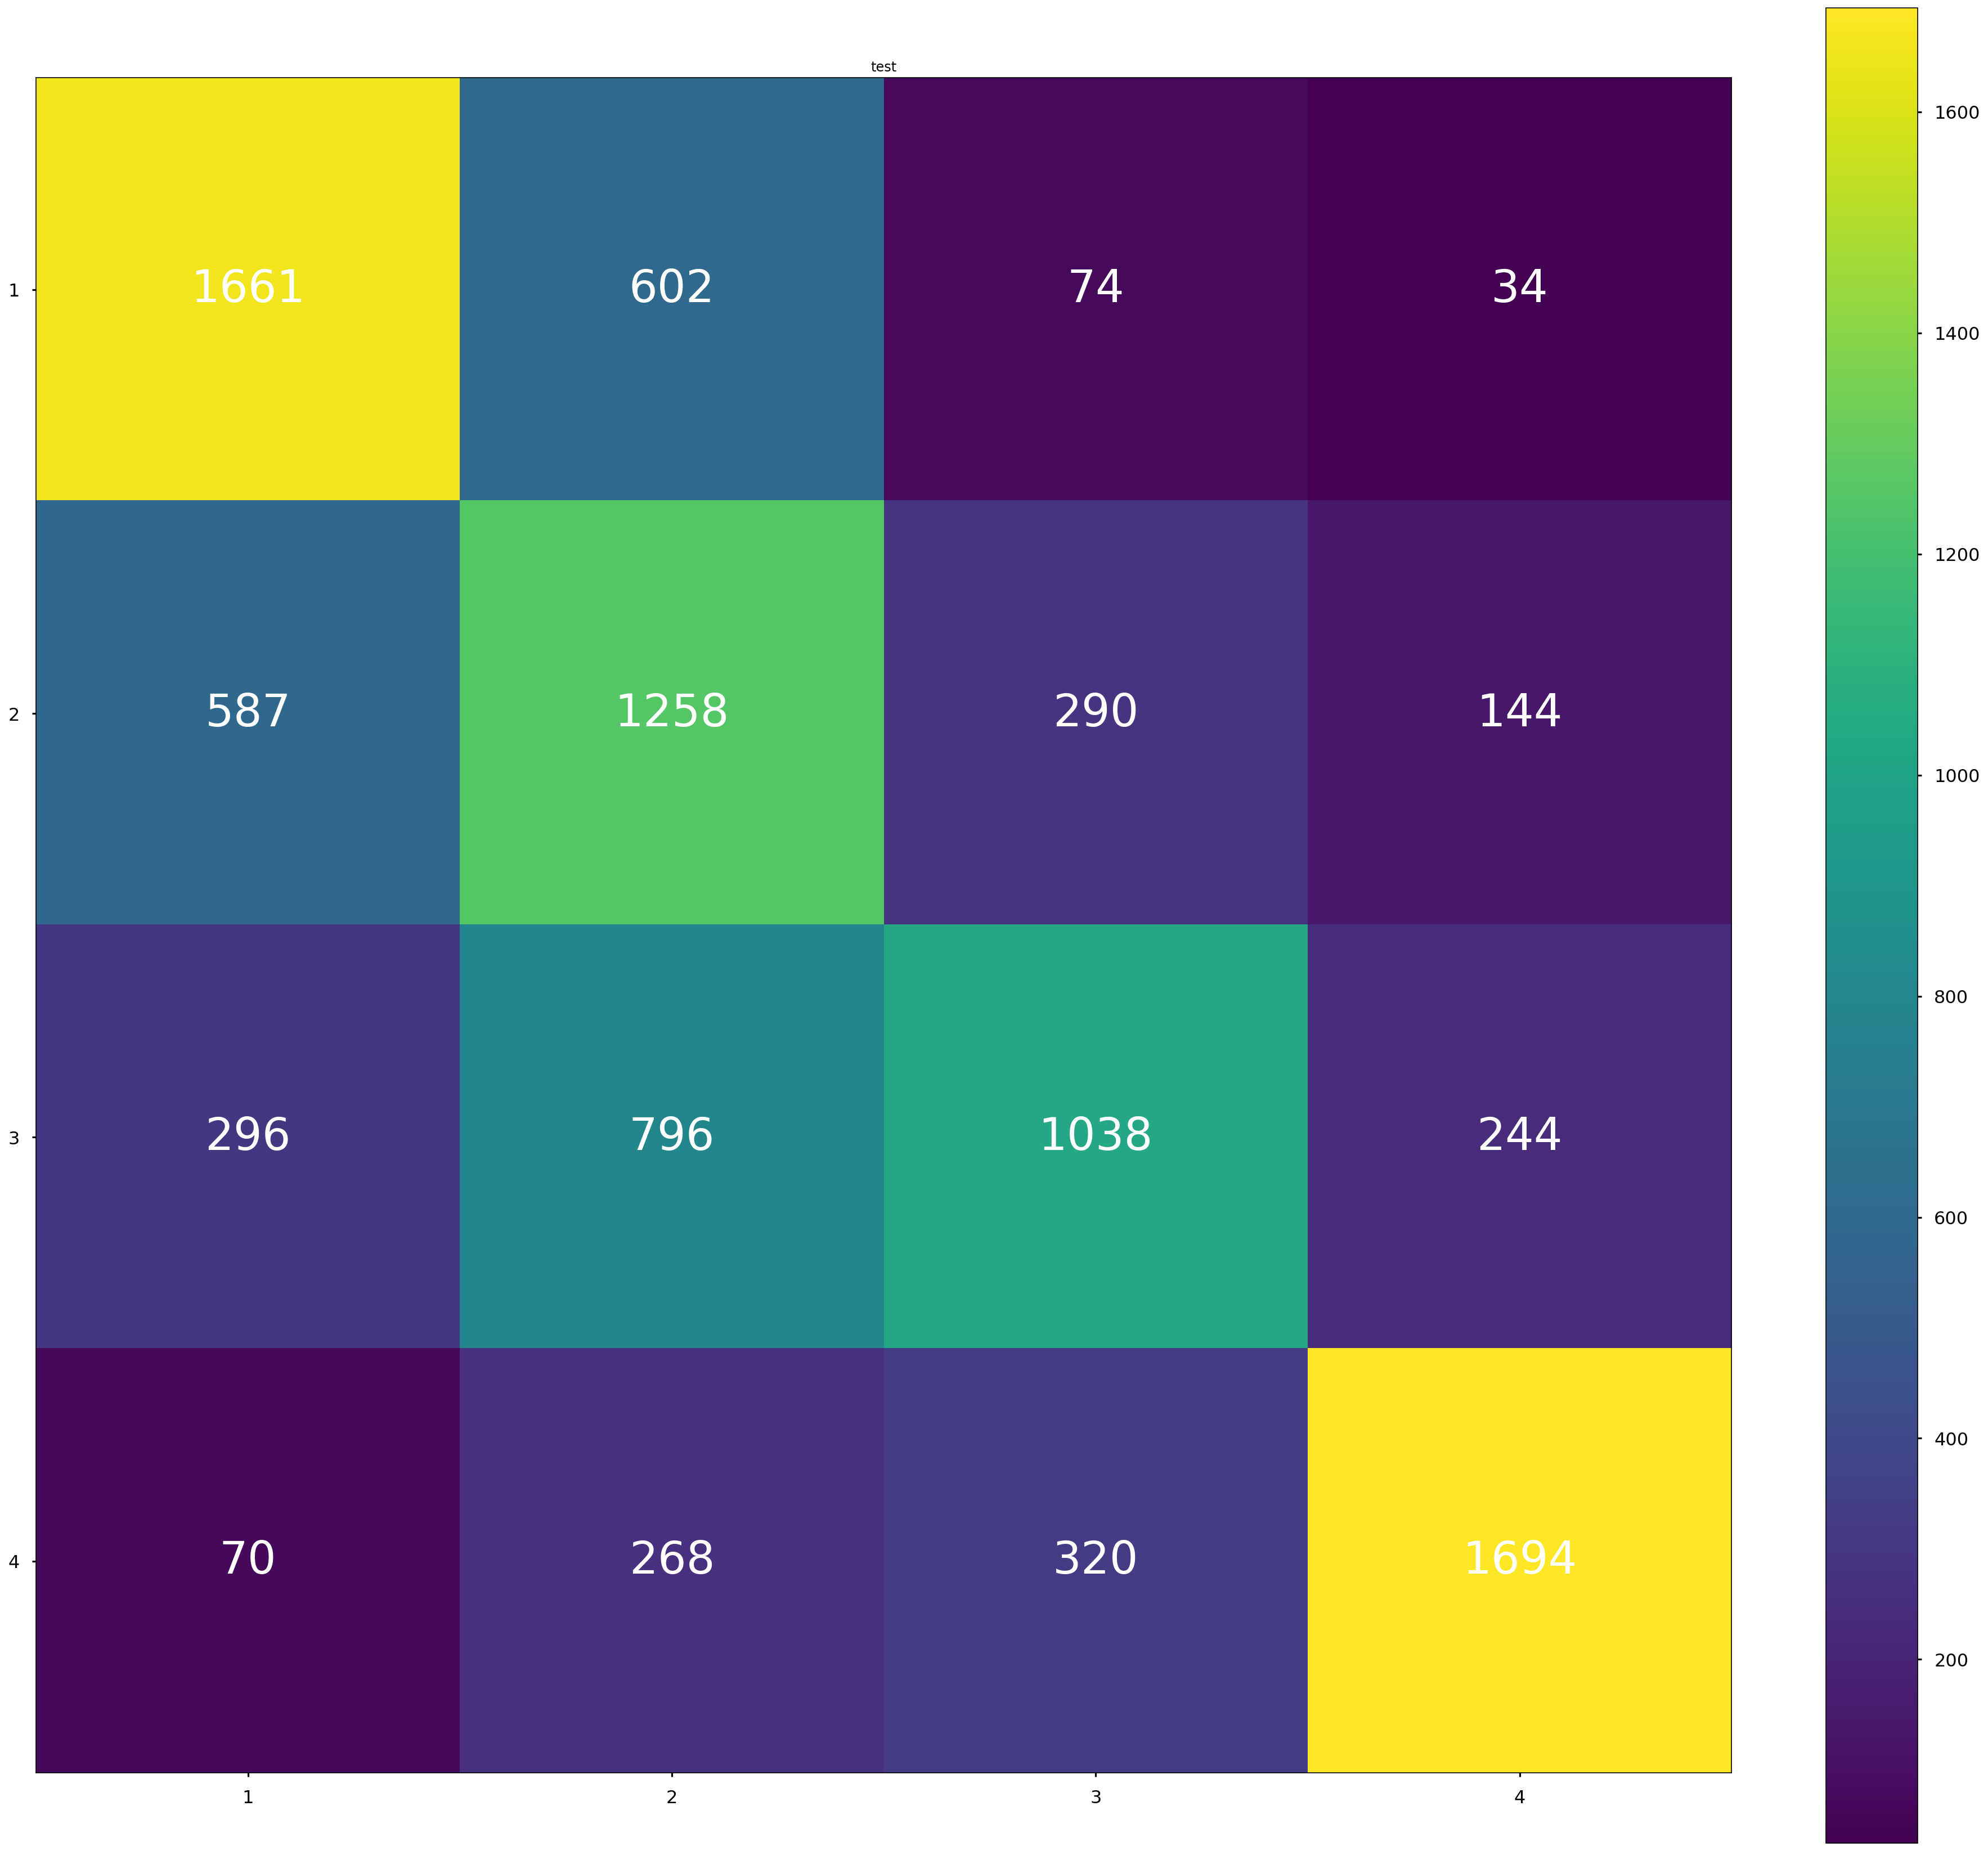

In [27]:
title = 'test'
cmap=plt.cm.viridis
plt.figure(figsize=(30, 30))
plt.imshow(d, interpolation='nearest', cmap=cmap)  
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
plt.xticks(np.arange(4), ('1', '2', '3','4'))
plt.yticks(np.arange(4), ('1', '2', '3','4'))
plt.rc('font', size=40)  
fmt = 'd' 
thresh = 1
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        plt.text(j, i, format(d[i, j], fmt),
                 ha="center", va="center", color="white" if d[i, j] > thresh else "black")
#출저:https://m.blog.naver.com/judy3578/222036300794 혼동행렬을 색깔로 표현하기

<h1>모델 2: RandomForrest 모델

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_body_model = RandomForestClassifier()
random_body_model.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, random_body_model.predict(X_test)))

정확도:  0.6294795221843004


In [66]:
param_grid = [
    {'n_estimators': [3,10,30,100,200], 'max_features': [2,3,4,5,6,7]},
    {'bootstrap': [False], 'n_estimators': [3,10,12,100,200], 'max_features': [2,3,4,5,6,7]},
  ]


grid_search = GridSearchCV(random_body_model, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 3, 4, 5, 6, 7],
                          'n_estimators': [3, 10, 30, 100, 200]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 5, 6, 7],
                          'n_estimators': [3, 10, 12, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [67]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 200}

In [68]:
print('정확도: ',accuracy_score(y_test, grid_search.predict(X_test)))

정확도:  0.6322525597269625


In [69]:
from sklearn.metrics import confusion_matrix

d=confusion_matrix(y_test, grid_search.predict(X_test))
print(d)

[[1695  569   93   14]
 [ 540 1181  438  120]
 [ 257  623 1264  230]
 [  47  180  337 1788]]


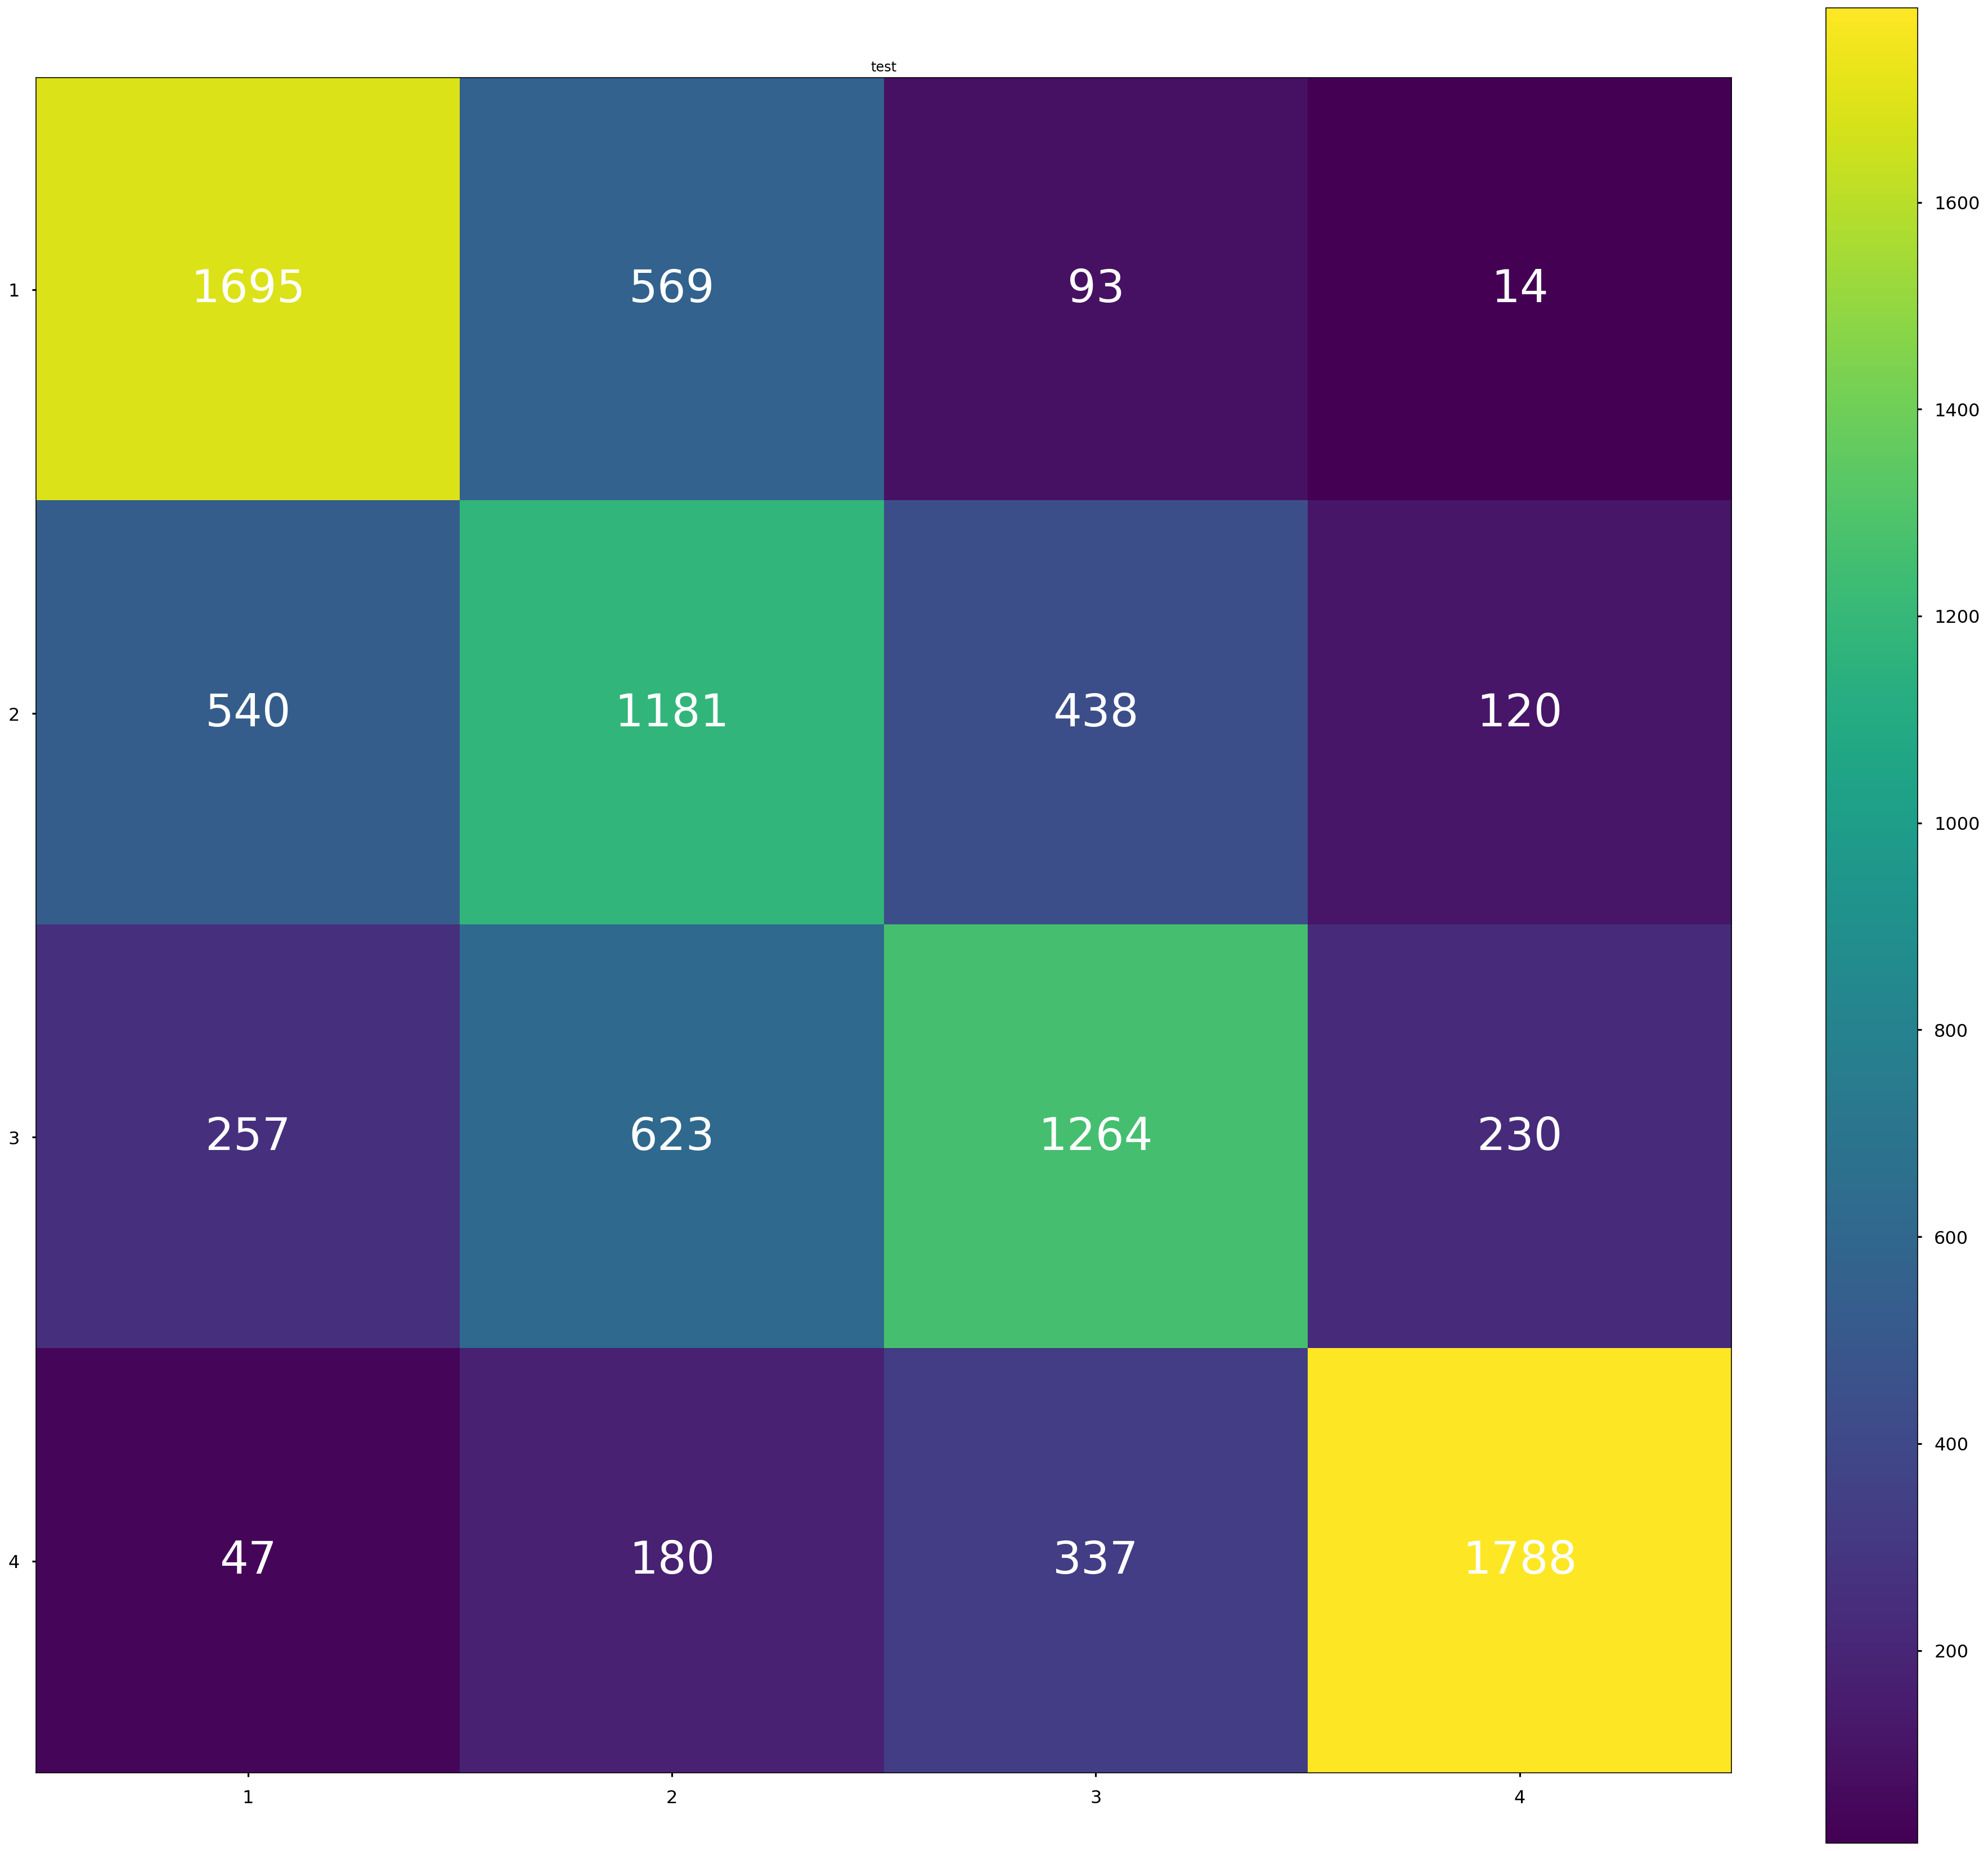

In [70]:
title = 'test'
cmap=plt.cm.viridis
plt.figure(figsize=(30, 30))
plt.imshow(d, interpolation='nearest', cmap=cmap)  
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
plt.xticks(np.arange(4), ('1', '2', '3','4'))
plt.yticks(np.arange(4), ('1', '2', '3','4'))
plt.rc('font', size=40)  
fmt = 'd' 
thresh = 1
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        plt.text(j, i, format(d[i, j], fmt),
                 ha="center", va="center", color="white" if d[i, j] > thresh else "black")
#출저:https://m.blog.naver.com/judy3578/222036300794 혼동행렬을 색깔로 표현하기

<h1>모델 3:  Gradient Boosting 모델 

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
tree_body_df= GradientBoostingClassifier(random_state=0) 
tree_body_df.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, tree_body_df.predict(X_test)))

정확도:  0.6303327645051194


<h1> 튜닝을 위해 최적의 파라미터를 찾아보았다.

In [32]:
param_grid = {
    'n_estimators' : [100,500,200,300],
    'learning_rate' : [0.05, 0.1,0.001]
}

gradient_model = GridSearchCV(tree_body_df, param_grid,cv=2 ,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
gradient_model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.001],
                         'n_estimators': [100, 500, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
gradient_model.best_params_

{'learning_rate': 0.05, 'n_estimators': 300}

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_model= GradientBoostingClassifier(random_state=0,learning_rate= 0.1, n_estimators= 500) 
gradient_model.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, tree_body_df.predict(X_test)))

정확도:  0.6303327645051194


In [35]:
from sklearn.metrics import confusion_matrix

d=confusion_matrix(y_test, gradient_model.predict(X_test))
print(d)

[[1702  516  133   20]
 [ 575 1103  485  116]
 [ 271  600 1271  232]
 [  55  170  349 1778]]


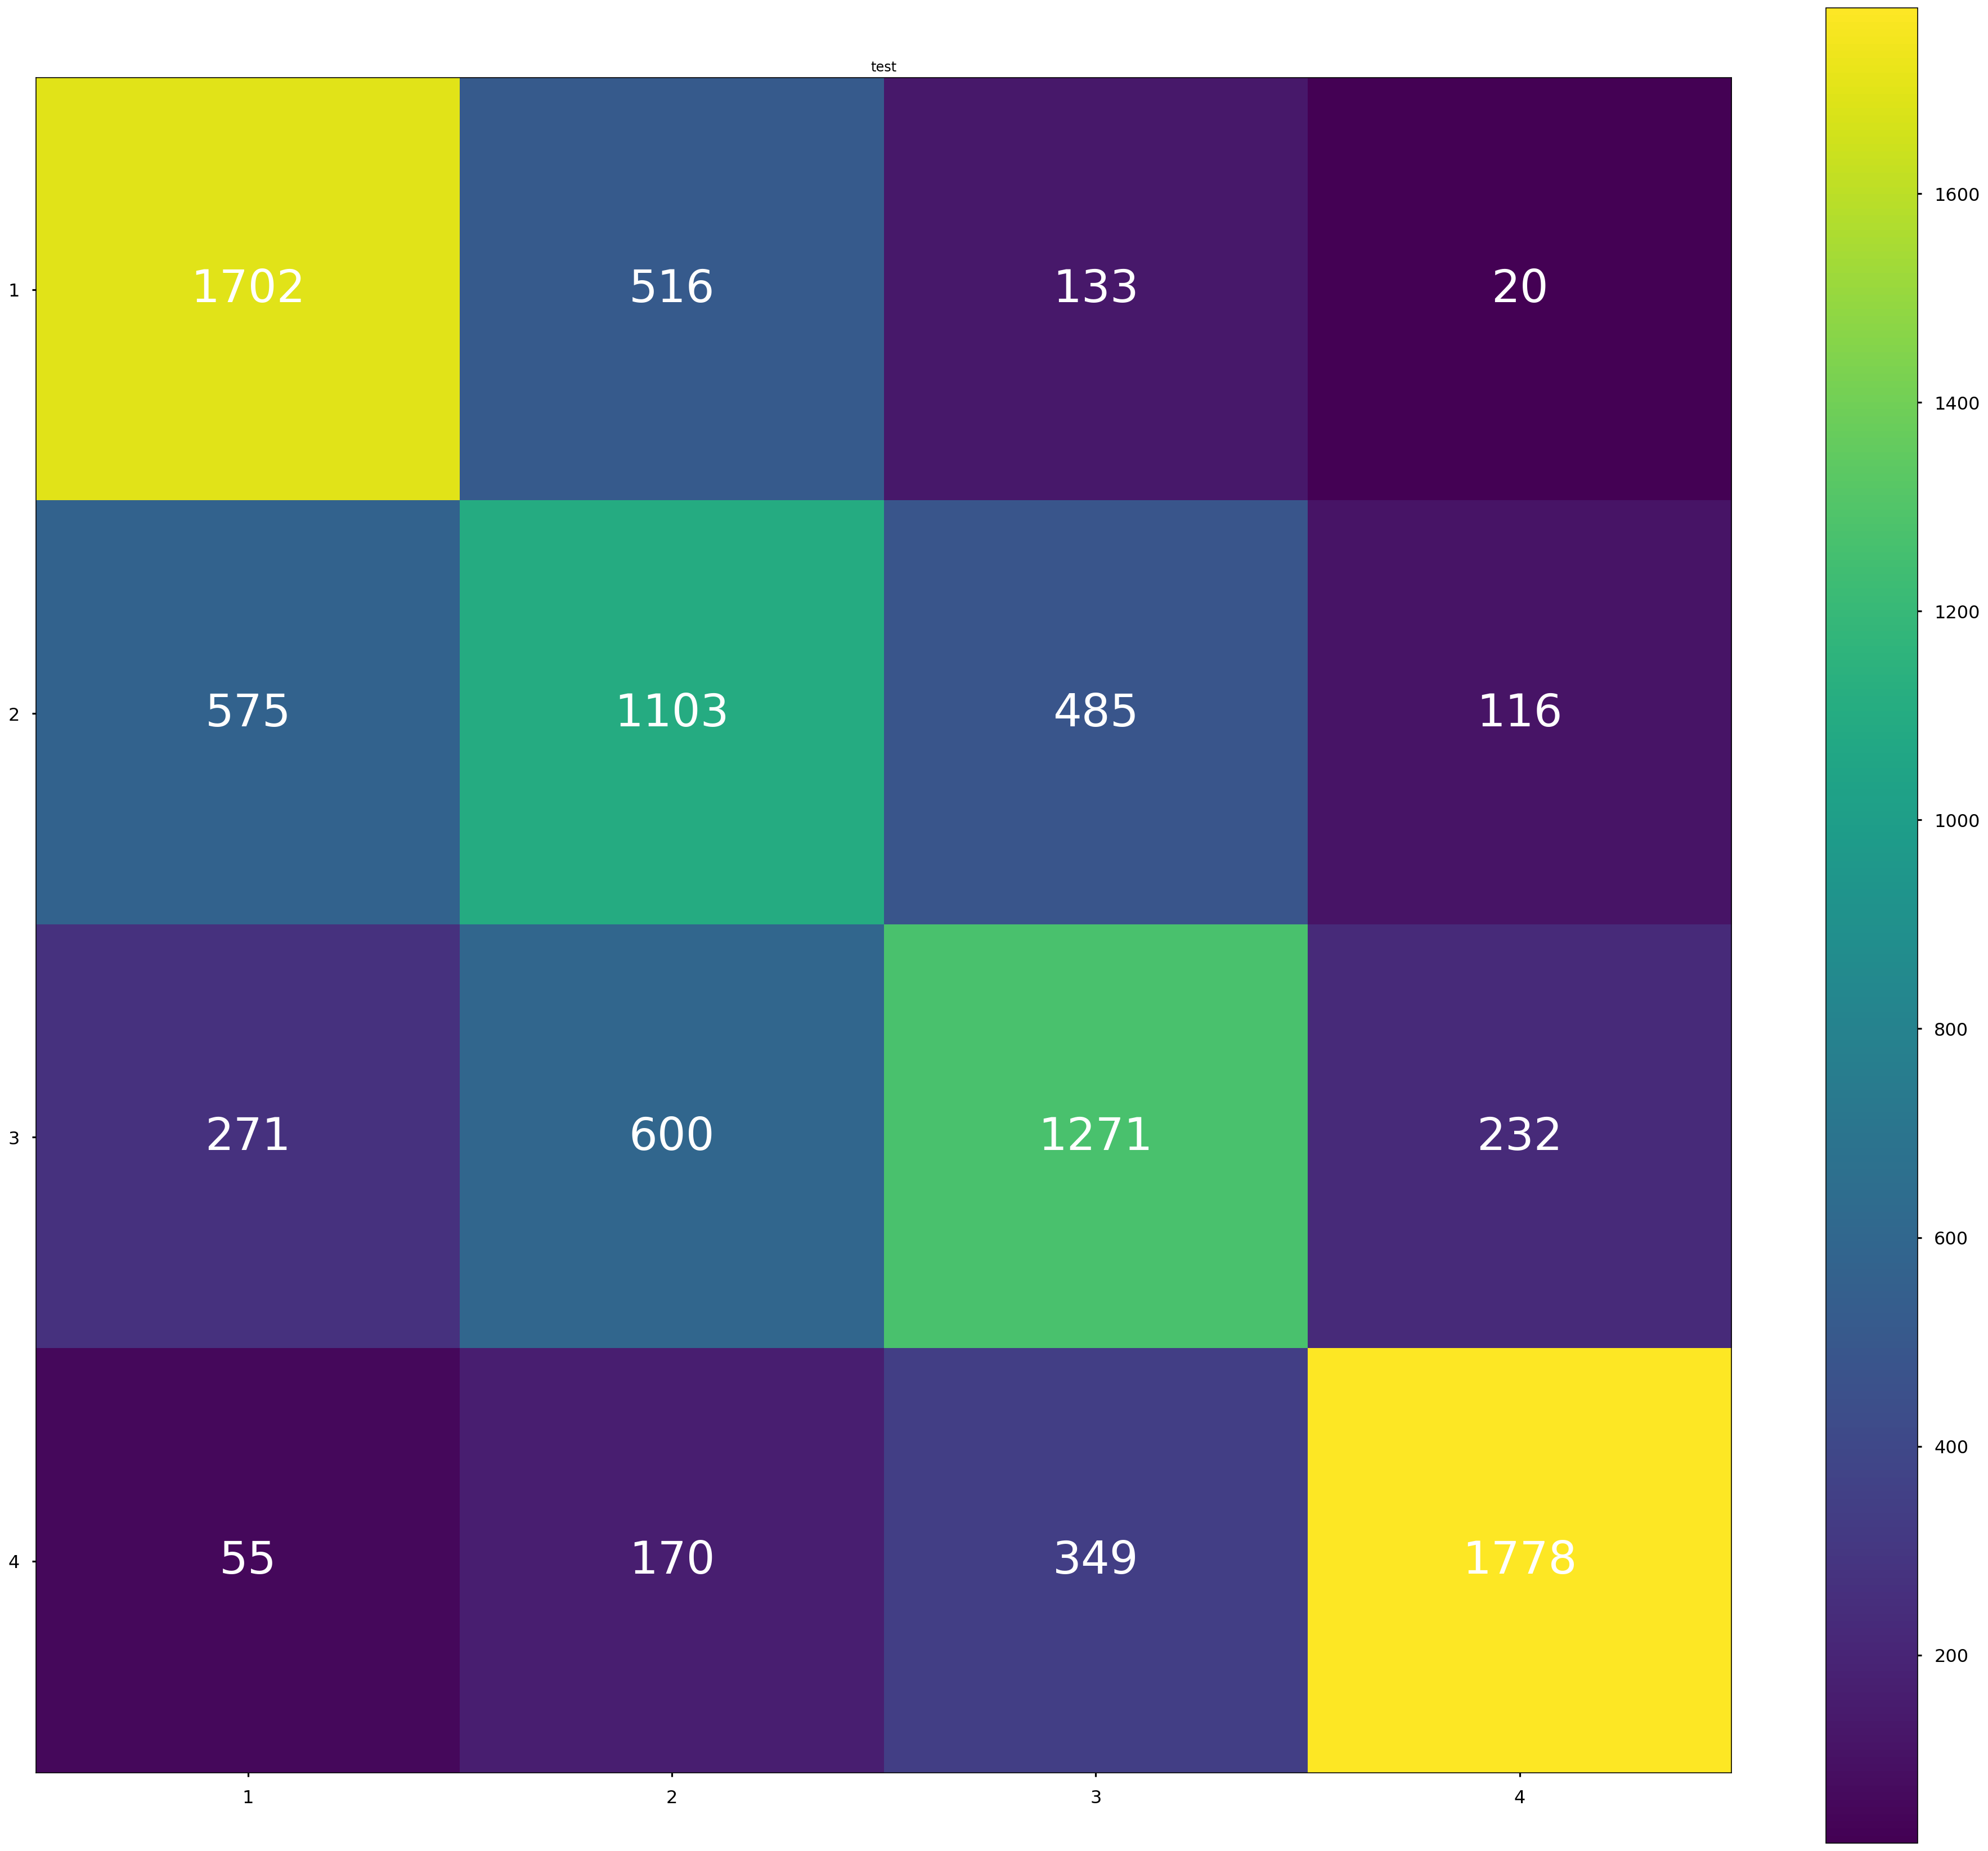

In [36]:
title = 'test'
cmap=plt.cm.viridis
plt.figure(figsize=(30, 30))
plt.imshow(d, interpolation='nearest', cmap=cmap)  
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(4), ('1', '2', '3','4'))
plt.yticks(np.arange(4), ('1', '2', '3','4'))
plt.rc('font', size=40)  
fmt = 'd' 
thresh = 1
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        plt.text(j, i, format(d[i, j], fmt),
                 ha="center", va="center", color="white" if d[i, j] > thresh else "black")
#출저:https://m.blog.naver.com/judy3578/222036300794 혼동행렬을 색깔로 표현하기


## <h1>모델 4: 신경망 MLPClassifier (다중 분류를 지원)

In [37]:
from sklearn.neural_network import MLPClassifier
MLP_df = MLPClassifier(solver='adam',max_iter=300)
MLP_df.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, MLP_df.predict(X_test)))

정확도:  0.6507039249146758


In [38]:
from sklearn.metrics import confusion_matrix

d=confusion_matrix(y_test, MLP_df.predict(X_test))
print(d)

[[1817  462   78   14]
 [ 586 1195  412   86]
 [ 236  632 1271  235]
 [  37  176  321 1818]]


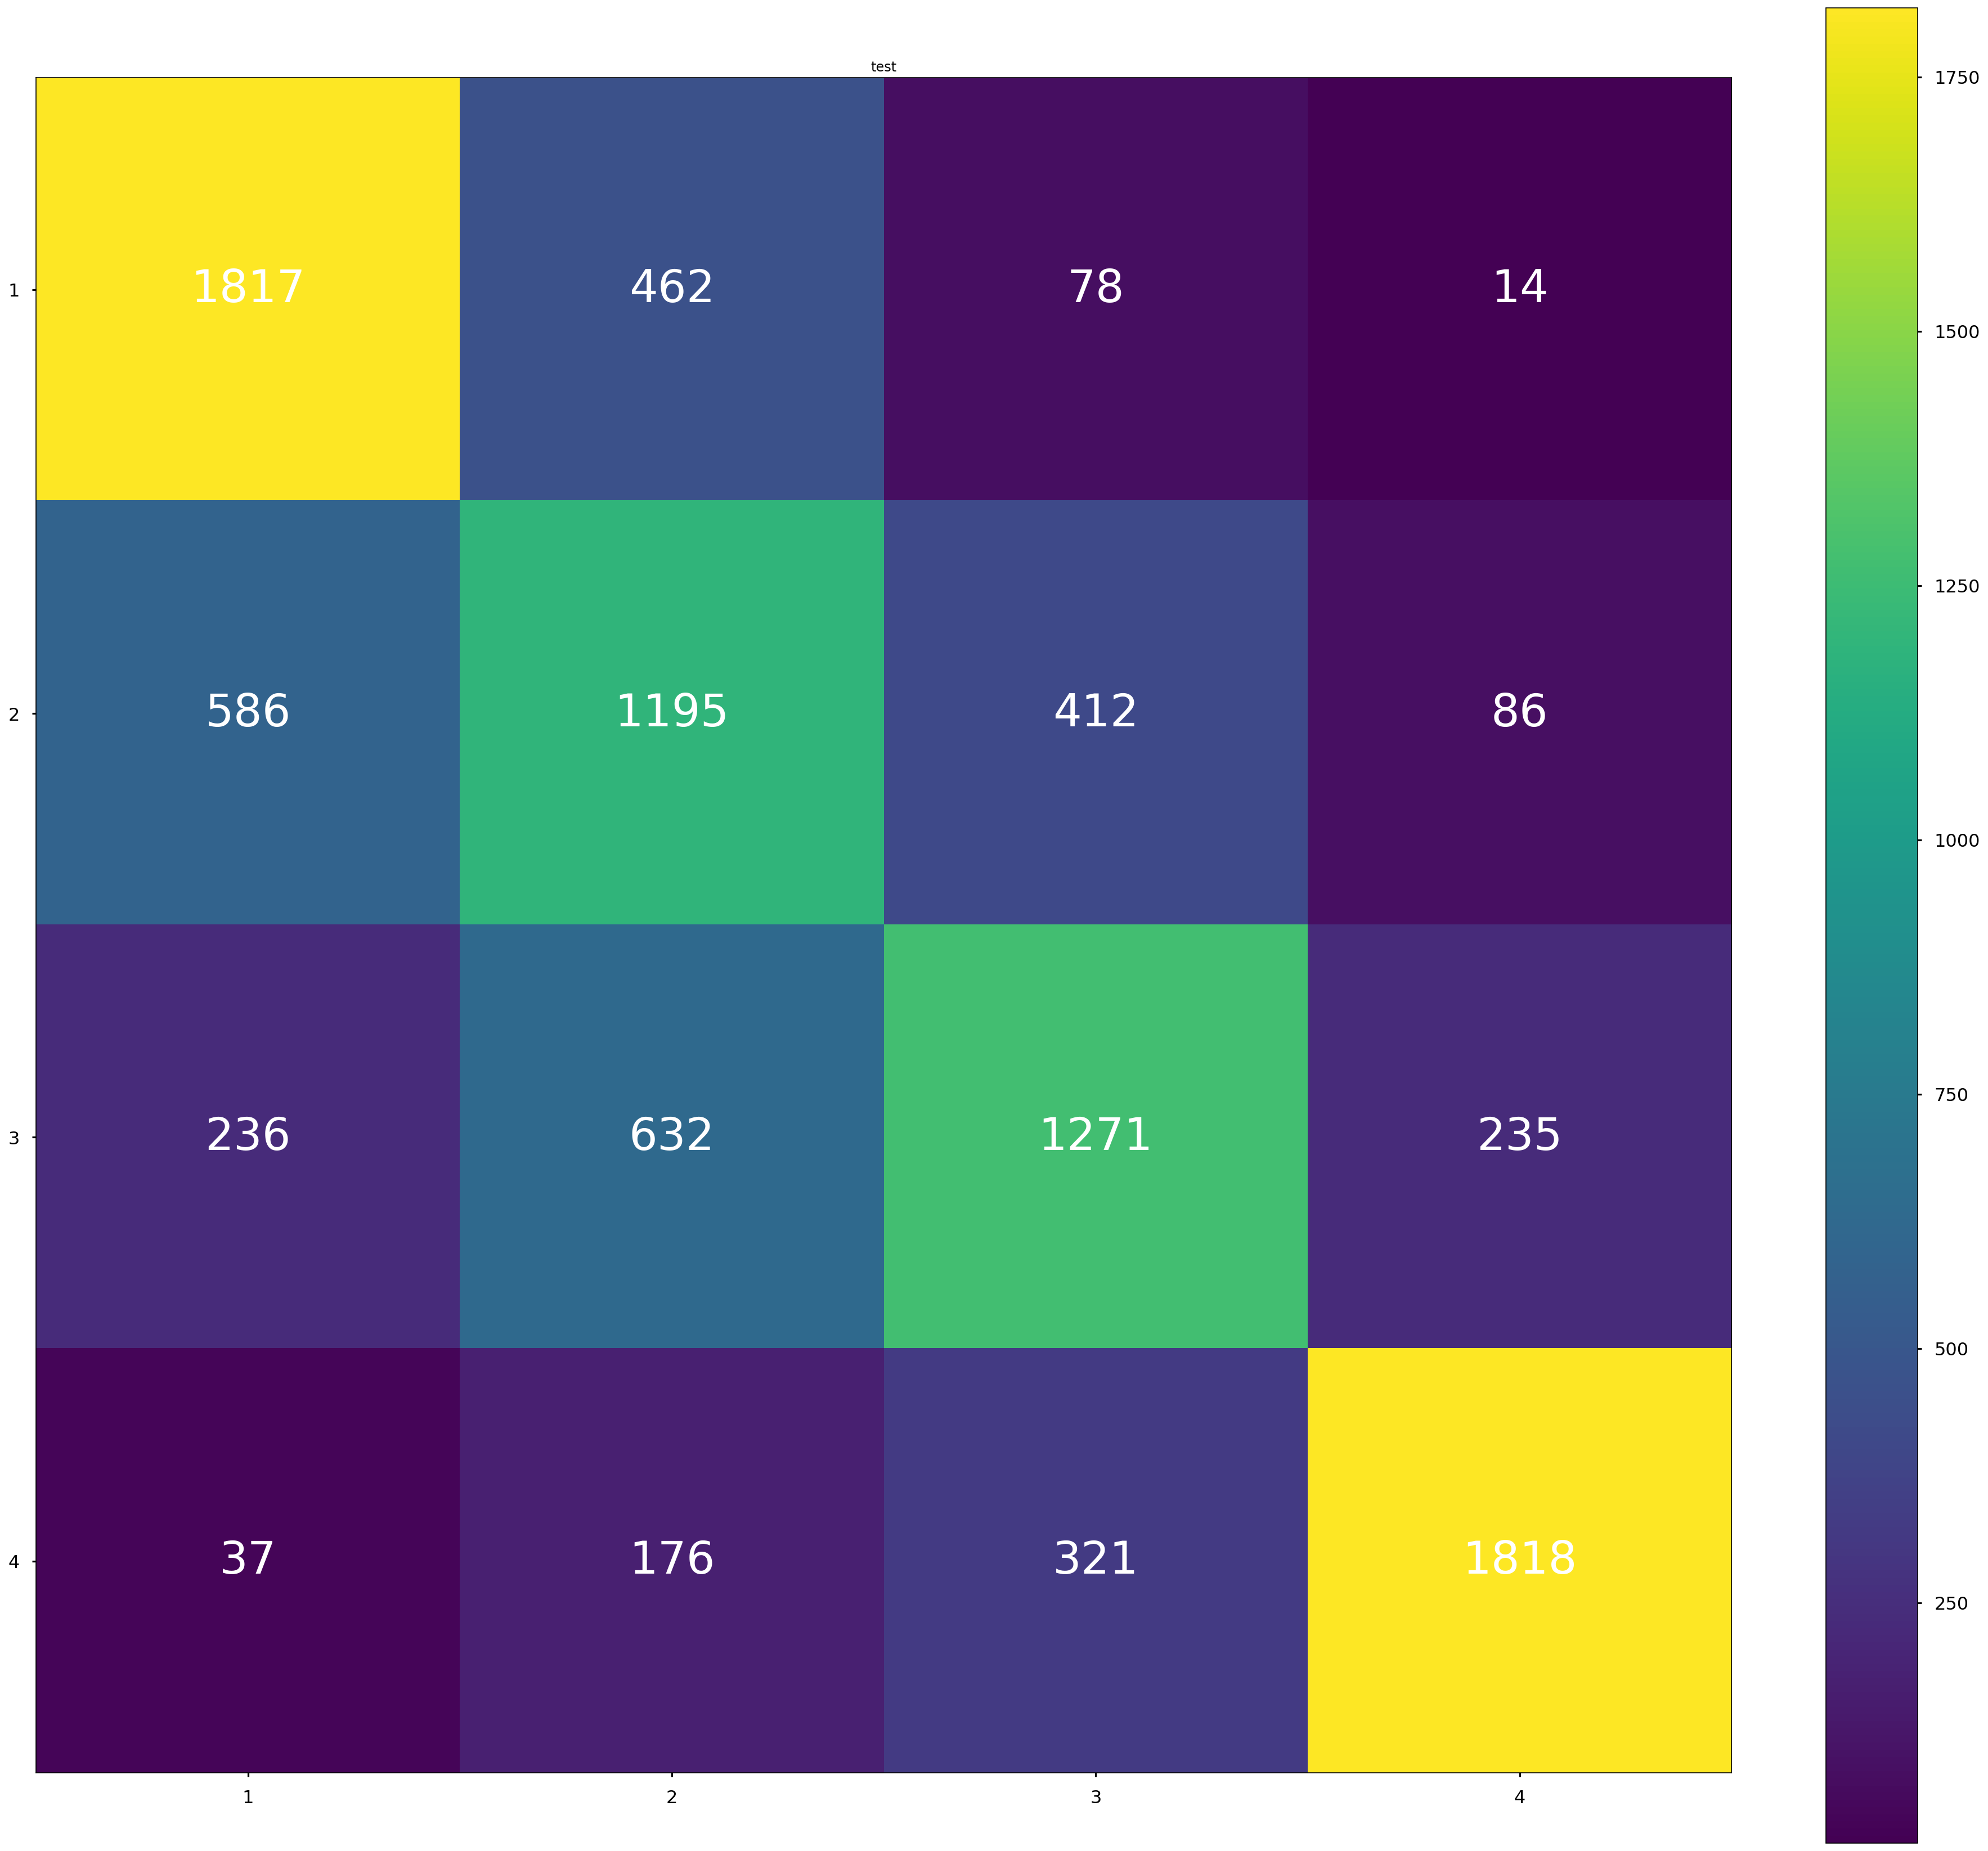

In [39]:
title = 'test'
cmap=plt.cm.viridis
plt.figure(figsize=(30, 30))
plt.imshow(d, interpolation='nearest', cmap=cmap) 
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(4), ('1', '2', '3','4'))
plt.yticks(np.arange(4), ('1', '2', '3','4'))
plt.rc('font', size=40)  
fmt = 'd' 
thresh = 1
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        plt.text(j, i, format(d[i, j], fmt),
                 ha="center", va="center", color="white" if d[i, j] > thresh else "black")
#출저:https://m.blog.naver.com/judy3578/222036300794 혼동행렬을 색깔로 표현하기 

## <h1>모델 5:  KNeighborsClassifier 모델

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN_df = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, metric='minkowski')
KNN_df.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, KNN_df.predict(X_test)))

정확도:  0.5928967576791809


## <h1>너무 좋지 않은 결과로 최적의 k값을 찾아보았다.

k의 값 1 정확도:  0.5388225255972696
k의 값 2 정확도:  0.5444752559726962
k의 값 3 정확도:  0.5669795221843004
k의 값 4 정확도:  0.5764718430034129
k의 값 5 정확도:  0.5928967576791809
k의 값 6 정확도:  0.5886305460750854
k의 값 7 정확도:  0.5953498293515358
k의 값 8 정확도:  0.5979095563139932
k의 값 9 정확도:  0.6015358361774744
k의 값 10 정확도:  0.6001493174061433
k의 값 11 정확도:  0.6045221843003413
k의 값 12 정확도:  0.6086817406143344
k의 값 13 정확도:  0.6059087030716723
k의 값 14 정확도:  0.6030290102389079
k의 값 15 정확도:  0.6018558020477816
k의 값 16 정확도:  0.6020691126279863
k의 값 17 정확도:  0.6038822525597269
k의 값 18 정확도:  0.60580204778157
k의 값 19 정확도:  0.6055887372013652
k의 값 20 정확도:  0.6042022184300341
k의 값 21 정확도:  0.6086817406143344
k의 값 22 정확도:  0.6055887372013652
k의 값 23 정확도:  0.609108361774744
k의 값 24 정확도:  0.6064419795221843
k의 값 25 정확도:  0.6086817406143344


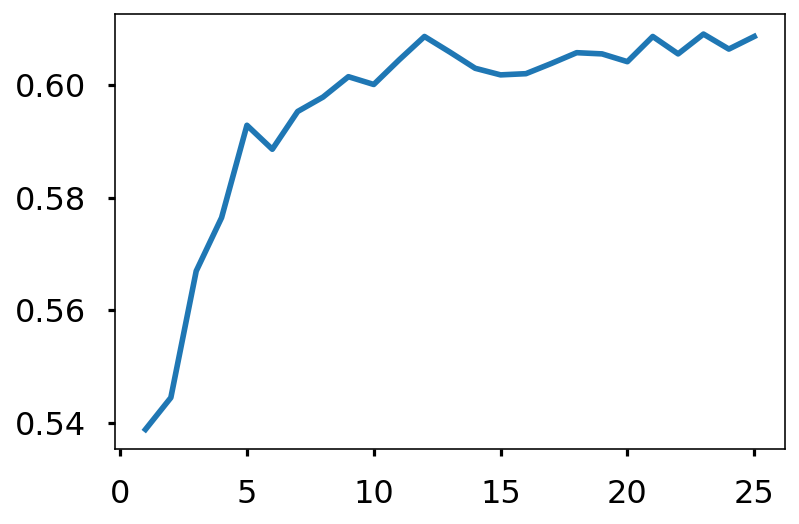

In [41]:
import sklearn.metrics as metrics
k_range = list(range(1, 26))
scores = []
for i in k_range:
    KNN_df1 = KNeighborsClassifier(n_neighbors=i)
    KNN_df1.fit(X_train, y_train)
    print('k의 값',i,'정확도: ',accuracy_score(y_test, KNN_df1.predict(X_test)))
    y_pred = KNN_df1.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [42]:
KNN_df1 = KNeighborsClassifier(n_neighbors=23, algorithm='auto', leaf_size=30, metric='minkowski')
KNN_df1.fit(X_train, y_train)
print('정확도: ',accuracy_score(y_test, KNN_df1.predict(X_test)))

정확도:  0.609108361774744


In [43]:
from sklearn.metrics import confusion_matrix

d=confusion_matrix(y_test, KNN_df1.predict(X_test))
print(d)

[[1811  490   57   13]
 [ 704 1165  335   75]
 [ 316  797 1154  107]
 [  56  229  486 1581]]


<h1> 아무리 좋아도 정확도가 60이상 넘어가기가 힘든 결과로 적합한 모델은 아닌듯 하다

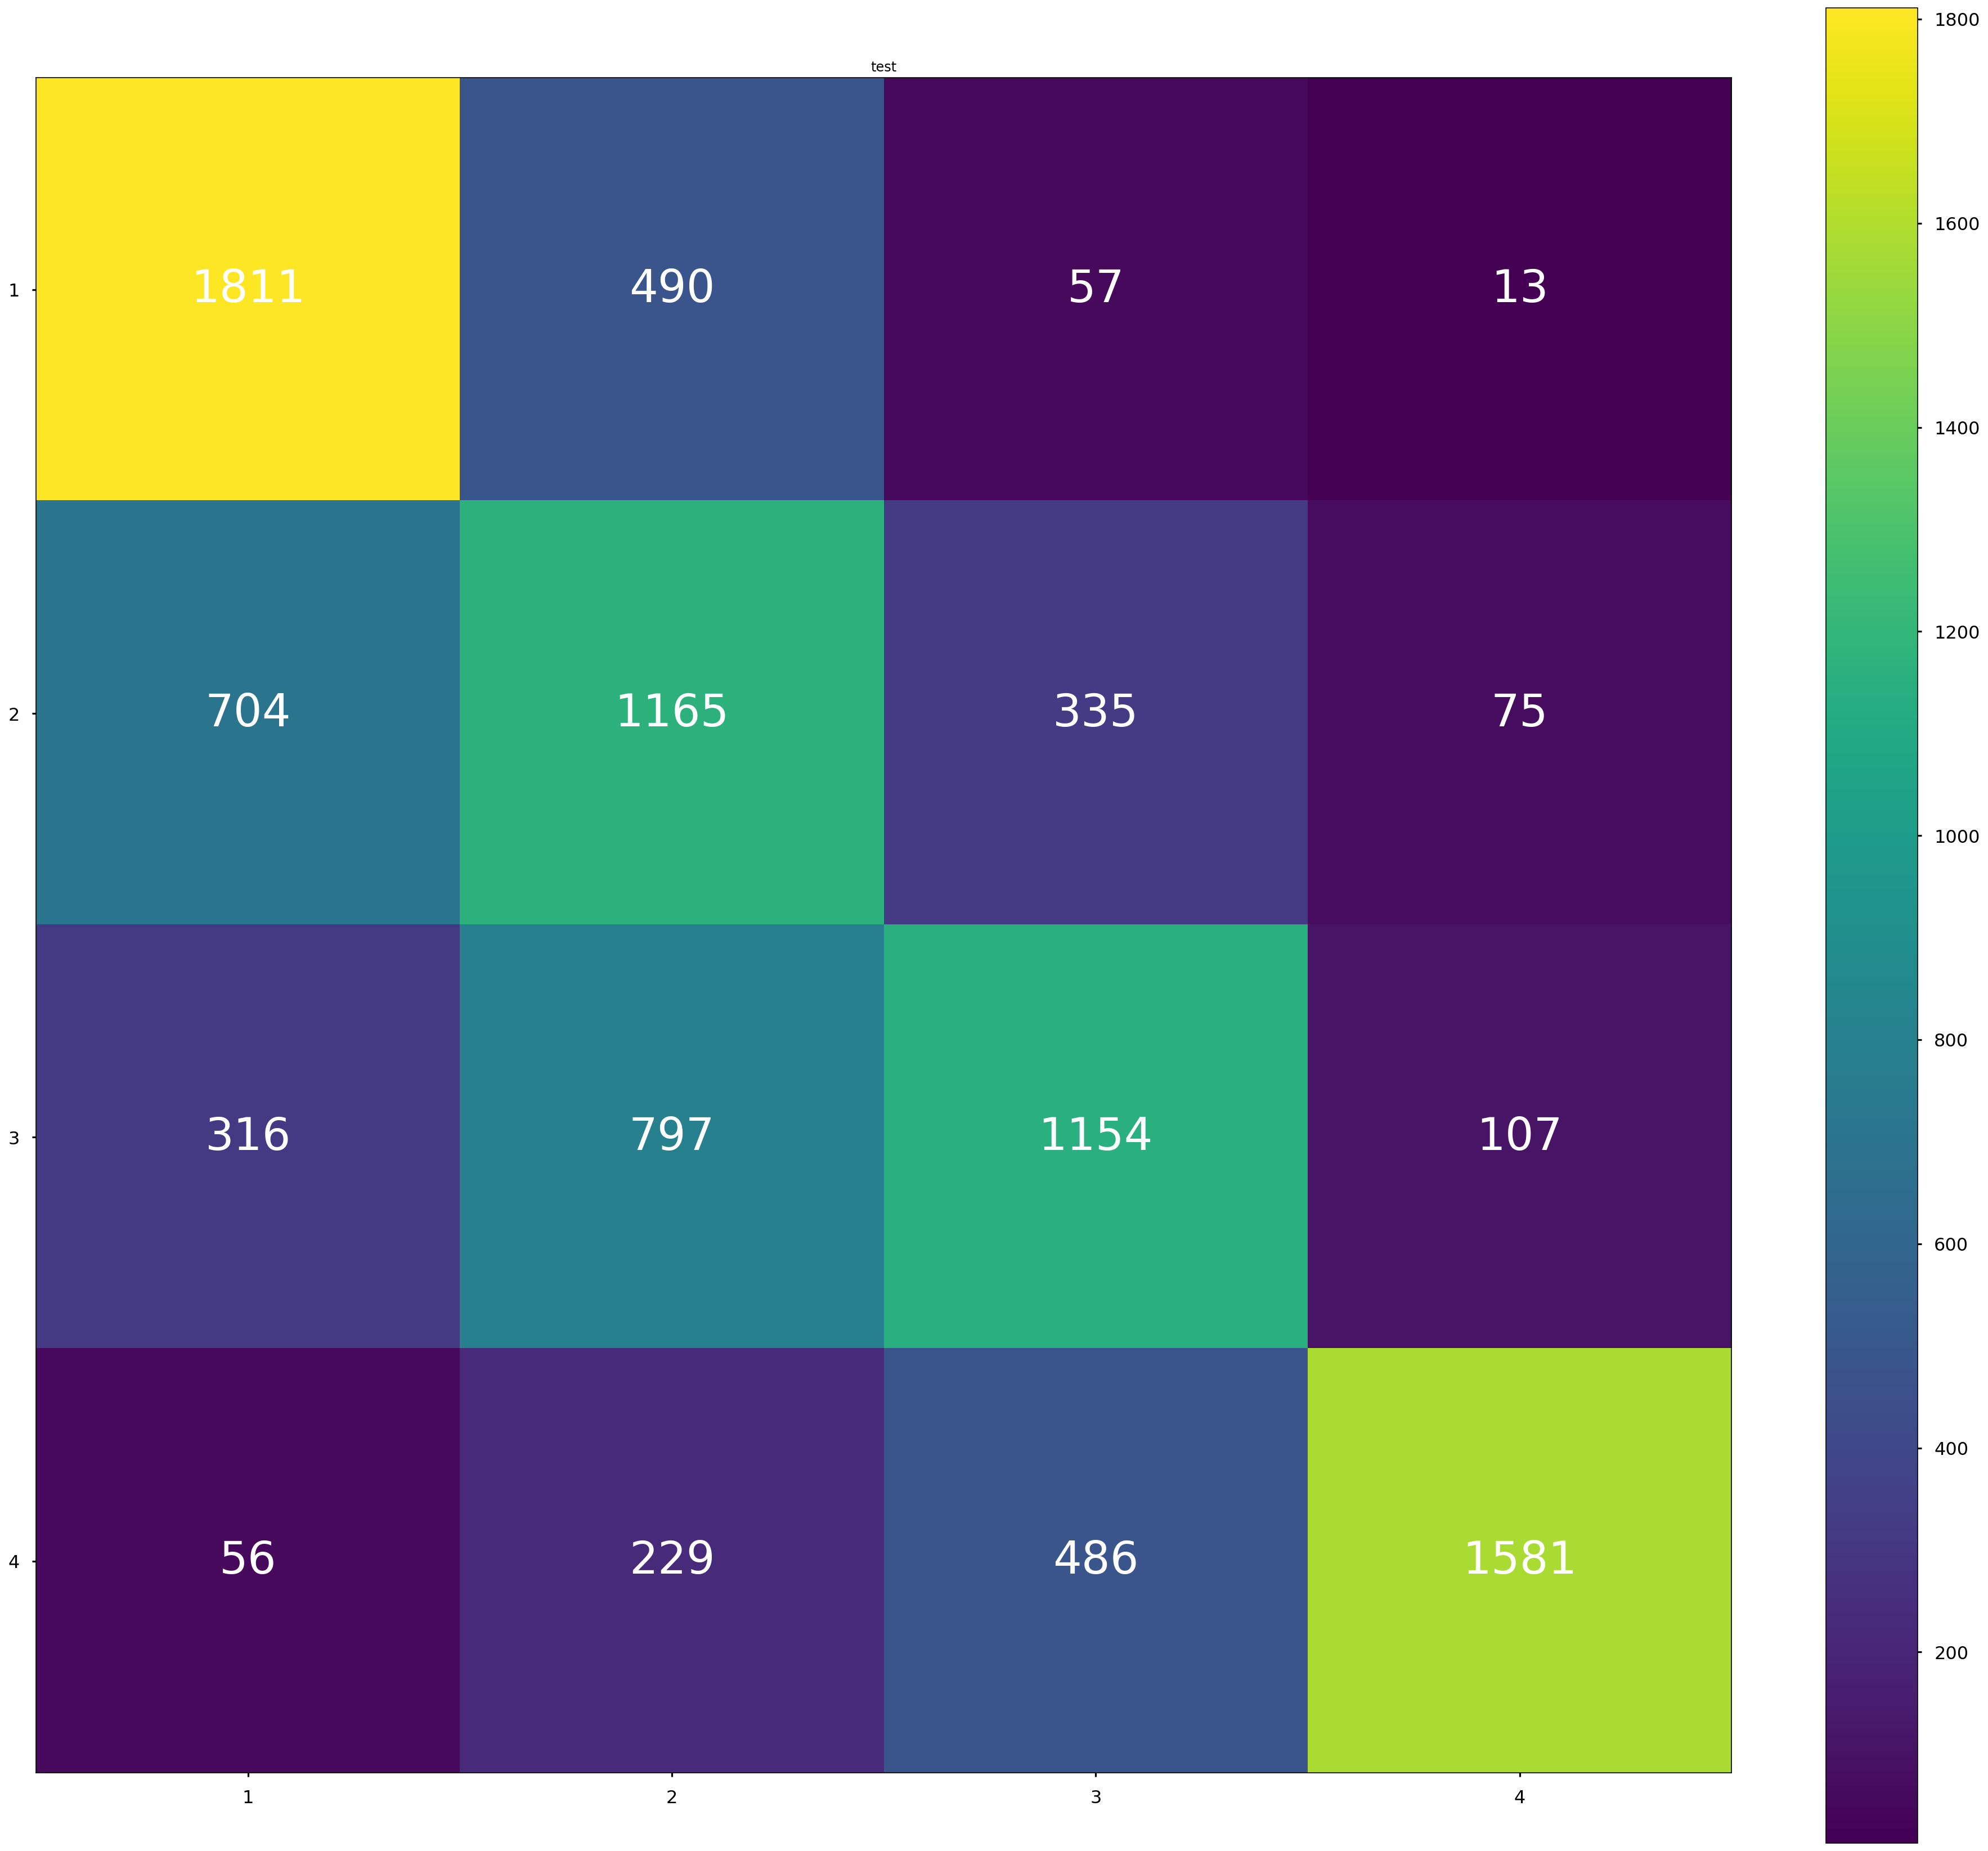

In [44]:
title = 'test'
cmap=plt.cm.viridis
plt.figure(figsize=(30, 30))
plt.imshow(d, interpolation='nearest', cmap=cmap)  
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(4), ('1', '2', '3','4'))
plt.yticks(np.arange(4), ('1', '2', '3','4'))
plt.rc('font', size=40)  
fmt = 'd' 
thresh = 1
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        plt.text(j, i, format(d[i, j], fmt),
                 ha="center", va="center", color="white" if d[i, j] > thresh else "black")
#출저:https://m.blog.naver.com/judy3578/222036300794 혼동행렬을 색깔로 표현하기 

<h1>결론:성능은 신경망 MLPClassifier 모델이 가장 좋게 나왔다